<h1>Project Part II</h1>
<h2>Group 9: Angel Labrada-Galvan, Angela Gomez, Aubree Goff, Cynthia Mengqi Zhang, Garen Bainbridge, Hurley Haney, Layla Penland</h2>

1. Attempting this work

*IF Model Explanation*

* An Integrate and fire model is a computational model that mimics behavior of biological neurons by continuously summing and "integrating" incoming electrical signals until a threshold is reached. Once the threshold is reached, the model can "fire" an action potential.

    * Read more about leaky fire models here: https://neuronaldynamics.epfl.ch/online/Ch1.S3.html

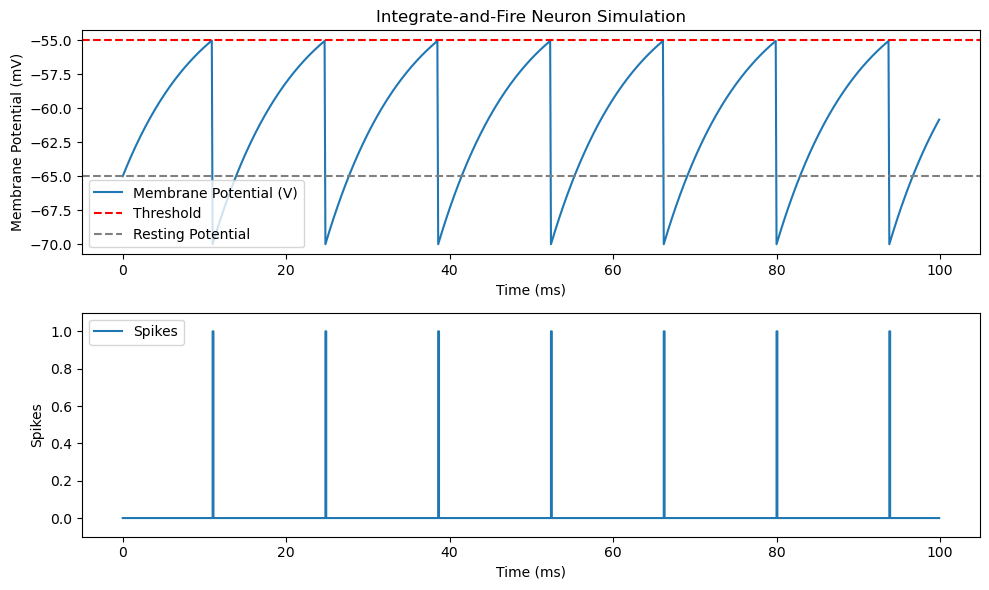

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1            # Time step (ms)
T = 100             # Total simulation time (ms)
time = np.arange(0, T, dt)
V_rest = -65        # Resting membrane potential (mV)
V_reset = -70       # Reset potential after spike (mV)
V_threshold = -55   # Firing threshold (mV)
R = 10              # Membrane resistance (MΩ)
tau_m = 10          # Membrane time constant (ms)
I_ext = 1.5         # External input current (nA)

# Variables
V = V_rest * np.ones_like(time)  # Membrane potential (initialized to V_rest)
spikes = np.zeros_like(time)    # Spike train (0 = no spike, 1 = spike)

# Simulation loop
for t in range(1, len(time)):
    # Compute membrane potential using Euler's method
    dV = (-(V[t-1] - V_rest) + R * I_ext) / tau_m * dt
    V[t] = V[t-1] + dV
    
    # Check for threshold crossing
    if V[t] >= V_threshold:
        V[t] = V_reset      # Reset potential after spike
        spikes[t] = 1       # Record spike

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, V, label="Membrane Potential (V)")
plt.axhline(V_threshold, color='r', linestyle='--', label="Threshold")
plt.axhline(V_rest, color='gray', linestyle='--', label="Resting Potential")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.title("Integrate-and-Fire Neuron Simulation")

plt.subplot(2, 1, 2)
plt.plot(time, spikes, drawstyle='steps-post', label="Spikes")
plt.xlabel("Time (ms)")
plt.ylabel("Spikes")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.tight_layout()
plt.show()



An LIF model, Leaky Integrate-and-Fire model, is essentially an Integrate-and-Fire model that takes into account the presence of leaky ion channels in a neuron. 
From the model visualization above, this model is missing the fluctuations in membrane potential present in real biological neurons as a result of leaky ion channels. 
In a real biological neuron, the curves would not be as smooth. 

Additionally, the membrane potentials reach the threshold with a single stimulation, rather than having to engage in temporal or spatial summation. 
Real biological neurons often have to utilize these two types of summation to ensure the membrane potential crosses the threshold for an action potential. 
The model also seems to be missing the refractory periods that biological neurons experience. 
However, the model does provide an accurate account for the depolarization, repolarization, and hyperpolarization.  

The most challenging aspect of this homework assignmnet was figuring out how to actually use a markdown cell.

It took us about 50 minutes to complete this assingnment

<h1>Part 3</h1>

**LIF and HH models:**
The Leaky-Integrate & Fire (LIF) Model is an extension of the Integrate & Fire (IF) Model. The LIF Model in corporates leaky ion channels that allow small amounts of current in and out naturally over the course of an action potential. Adding these channels allows for a more natural membrane potential decay rate. This makes the model more biologically realistic in comparison to the IF Model that has a more abrupt membrane potential reset.

The Hodgkin-Huxley (HH) Model provides a more realistic and sophisticated interpretation of neuronal activity as it incorporates voltage-gated ion channels such as Na+ channels and K+ channels. An important limitation to note for the HH Model is 


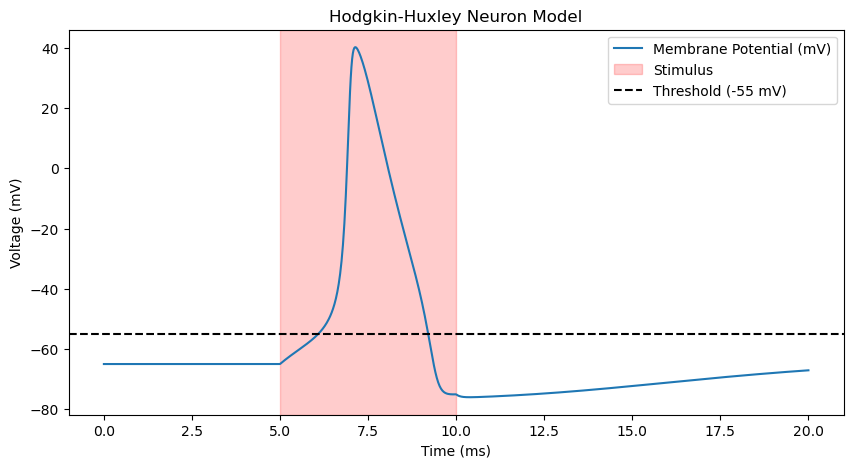

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Hodgkin-Huxley model parameters
Cm = 1.0  # Membrane capacitance, uF/cm^2
ENa = 50.0  # Sodium reversal potential, mV
EK = -77.0  # Potassium reversal potential, mV
EL = -54.387  # Leak reversal potential, mV
gNa = 120.0  # Maximum sodium conductance, mS/cm^2
gK = 36.0  # Maximum potassium conductance, mS/cm^2
gL = 0.3  # Leak conductance, mS/cm^2

# External current
def I_ext(t):
    return 10.0 if 5.0 <= t <= 10.0 else 0.0

# Gating variable steady-state functions and time constants
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)
def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))

# Hodgkin-Huxley differential equations
def hh_model(Y, t):
    V, n, m, h = Y
    
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    IL = gL * (V - EL)
    
    dVdt = (I_ext(t) - INa - IK - IL) / Cm
    
    return [dVdt, dndt, dmdt, dhdt]

# Initial conditions and time span
t = np.linspace(0, 20, 1000)
Y0 = [-65, 0.3177, 0.0529, 0.5961]  # Resting potential and gating variables

# Solve ODE
solution = odeint(hh_model, Y0, t)
V = solution[:, 0]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, V, label='Membrane Potential (mV)')
plt.axvspan(5, 10, color='red', alpha=0.2, label='Stimulus')
plt.axhline(-55, color='black', linestyle='--', label="Threshold (-55 mV)")  # Threshold marker
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Hodgkin-Huxley Neuron Model')
plt.legend()
plt.show()


**Question 3b:**
"def I_ext_case2(t):  # Bursting input (multiple small pulses)
    if 5.0 <= t <= 10.0:
        return 10.0 * (np.sin(5 * np.pi * (t - 5)) > 0)  # 5 Hz bursts
    return 0.0"
"def I_ext_case1(t):  # Sub-threshold input
    return 2.0 if 5.0 <= t <= 10.0 else 0.0"

These were the changes that were made to the code to make the graph follow the new inputs. For the bursting input, the code creates a bunch of small inputs of current which sum together to recah threshold, which is why on the plot there is an action potential. For the sub-threshold input, the function only allows for a current that doesn't reach threshold, whcih is why it begins to increase but then starts to decay instead of producing an action potential.

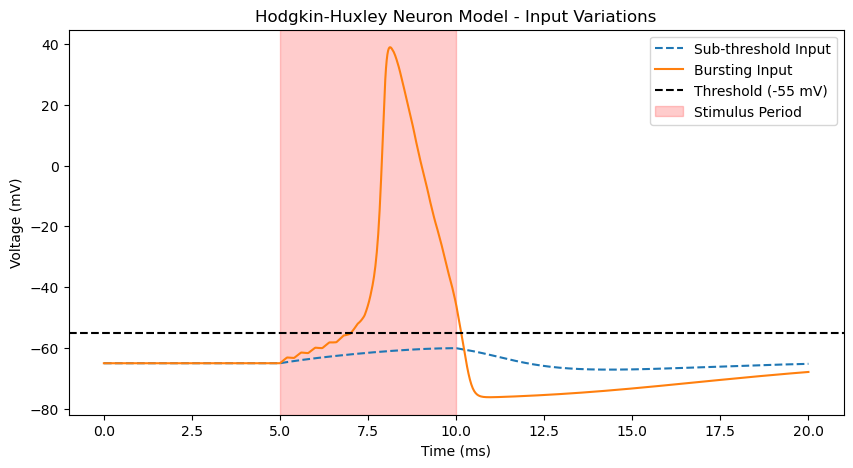

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Hodgkin-Huxley model parameters
Cm = 1.0  # Membrane capacitance, uF/cm^2
ENa = 50.0  # Sodium reversal potential, mV
EK = -77.0  # Potassium reversal potential, mV
EL = -54.387  # Leak reversal potential, mV
gNa = 120.0  # Maximum sodium conductance, mS/cm^2
gK = 36.0  # Maximum potassium conductance, mS/cm^2
gL = 0.3  # Leak conductance, mS/cm^2

# Different external current inputs
def I_ext_case1(t):  # Sub-threshold input (weaker)
    return 2.0 if 5.0 <= t <= 10.0 else 0.0  

def I_ext_case2(t):  # Bursting input (pulses)
    if 5.0 <= t <= 10.0:
        return 10.0 * (np.sin(5 * np.pi * (t - 5)) > 0)  # 5 Hz bursts
    return 0.0

# Gating variable steady-state functions and time constants
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)
def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))

# Hodgkin-Huxley differential equations
def hh_model(Y, t, I_ext):
    V, n, m, h = Y
    
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    IL = gL * (V - EL)
    
    dVdt = (I_ext(t) - INa - IK - IL) / Cm
    
    return [dVdt, dndt, dmdt, dhdt]

# Initial conditions and time span
t = np.linspace(0, 20, 1000)
Y0 = [-65, 0.3177, 0.0529, 0.5961]  # Resting potential and gating variables

# Solve ODE for both cases
solution_case1 = odeint(hh_model, Y0, t, args=(I_ext_case1,))
solution_case2 = odeint(hh_model, Y0, t, args=(I_ext_case2,))
V_case1 = solution_case1[:, 0]
V_case2 = solution_case2[:, 0]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, V_case1, label='Sub-threshold Input', linestyle='--')
plt.plot(t, V_case2, label='Bursting Input', linestyle='-')

plt.axhline(-55, color='black', linestyle='--', label="Threshold (-55 mV)")  # Threshold marker
plt.axvspan(5, 10, color='red', alpha=0.2, label='Stimulus Period')  # Stimulus region

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Hodgkin-Huxley Neuron Model - Input Variations')
plt.legend()
plt.show()


**Question 4a:** 
The changes that needed to be made to the model to note the different scenarios were to alter the inputs that went into making the plot. For sub-threshold it neded to not reach -55mV and for bursting inputs it needed to show multiple inputs summing to reach threshold.

**Question 4b:** 
What chatgpt did to implement these changes was change the functions that went into creating the inputs for each scenario. IN bursting it used a bursted sinusoidal input as opposed to a step input and for threshold it just made sure it ensured there was not enough current to produce a threshold.
"def I_ext_case2(t):  # Bursting input (multiple small pulses)
    if 5.0 <= t <= 10.0:
        return 10.0 * (np.sin(5 * np.pi * (t - 5)) > 0)  # 5 Hz bursts
    return 0.0"
"def I_ext_case1(t):  # Sub-threshold input
    return 2.0 if 5.0 <= t <= 10.0 else 0.0"

**Question 4c:**
A bit, in relation to information theory, is a unit of information. It is a unit of measure that predicts uncertainty or surprise and represents a binary system where its possible states are 1 or 0. Bits are used to indicate the presence or absence of an action potential firing. For example, 1 bit is the amount of information required to discern between two equally likely outcomes.
 
Shannon's entropy is the measure of uncertainty involved in the value of a random variable or process. It describes the different possible random outcomes, or states, in a system.

The HH model contains more bits than the LIF because it includes the complex ion channels as well as the continuous dynamics of the membrane potential. The I&F and LIF model only focus on when spikes occur due to their binary nature, but the HH model includes inputs from the membrane, ion channels, and the electrical changes across the cell.
The HH model has the highest Shannon's entropy due to the sheer size of possible states. Because the model includes so many areas of input that can change and/or occur independently, the possible combinations of inputs is far greater than the possible states of the I&F and LIF models (binary).



**Question 5:**
Working on GitHub has taken a bit of a learning curve for us. We have found that it isn't as intuitive as we had thought. For example, when deleting stuff we noted that you have to delete it, then remove and then commit changes for it to truely get deleted. But, we have been learning and think that we will definitley get better at it as the semester goes on. 
